#Download Dataset 


Dataset containing of fruits and vegetables images from kaggle 

In [7]:
#install tflite model maker package 

!pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 27.4MB/s 
     |████████████████████████████████| 6.3MB 50.0MB/s 
     |████████████████████████████████| 112kB 59.0MB/s 
     |████████████████████████████████| 1.1MB 49.1MB/s 
     |████████████████████████████████| 122kB 58.7MB/s 
     |████████████████████████████████| 1.2MB 41.9MB/s 
     |████████████████████████████████| 92kB 13.4MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 686kB 48.6MB/s 
     |████████████████████████████████| 174kB 60.5MB/s 
     |████████████████████████████████| 645kB 48.2MB/s 
     |████████████████████████████████| 849kB 50.9MB/s 
     |████████████████████████████████| 194kB 61.8MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 38.2MB 69kB/s 
     |████████████████████████████████| 358kB 58.9MB/s 


In [8]:
#Import the required packages

import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [9]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [10]:
#download dataset from kaggle 

! kaggle datasets download moltean/fruits
! ls

 98% 743M/760M [00:05<00:00, 146MB/s]
100% 760M/760M [00:05<00:00, 149MB/s]
fruits.zip  sample_data


In [11]:
#extract file

import zipfile
import os

with zipfile.ZipFile('fruits.zip','r') as f:
  f.extractall('./fruits')

#create new folder  
os.listdir('./fruits/fruits-360')
os.chdir('./fruits/fruits-360/Training')
os.mkdir('Fruit New')

In [12]:
#move folder 

import shutil
folder = ["Apple Crimson Snow", "Banana", "Grape Pink", "Avocado", "Tomato 1", "Cucumber Ripe", "Onion Red Peeled", 
          "Onion White", "Watermelon", "Corn", "Papaya", "Mango", "Potato White", "Eggplant", "Pineapple"]
 
for f in folder:
    shutil.move(f, 'Fruit New')


In [13]:
#rename folder 

os.chdir('/content/fruits/fruits-360/Training/Fruit New')

os.rename("Apple Crimson Snow","Apple")
os.rename("Grape Pink", "Grape")
os.rename("Tomato 1", "Tomato")
os.rename("Cucumber Ripe", "Cucumber")
os.rename("Onion Red Peeled", "Onion Red")
os.rename("Potato White", "Potato")

In [14]:
#check folder 

parent_folder = '/content/fruits/fruits-360/Training'
train_dir = os.path.join(parent_folder, 'Fruit New')
os.listdir(train_dir)

['Mango',
 'Onion Red',
 'Watermelon',
 'Banana',
 'Potato',
 'Avocado',
 'Grape',
 'Apple',
 'Tomato',
 'Pineapple',
 'Eggplant',
 'Onion White',
 'Papaya',
 'Cucumber',
 'Corn']

#Data Preparation 

In [15]:
#Load the dataset

data = DataLoader.from_folder(train_dir)

INFO:tensorflow:Load image with size: 7181, num_label: 15, labels: Apple, Avocado, Banana, Corn, Cucumber, Eggplant, Grape, Mango, Onion Red, Onion White, Papaya, Pineapple, Potato, Tomato, Watermelon.


In [17]:
#Split the data into training data(80%), testing data(10%), validation data(10%)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [18]:
#print('Number of classes : {} '.format(data_load.num_classes))
#print('Number of training sample : {} '.format(train_data.size))
#print('Number of validation sample : {} '.format(validation_data.size))
#print('Number of test sample : {} '.format(test_data.size))

In [ ]:
#check label names 

label = data.index_to_label
label

['Apple',
 'Avocado',
 'Banana',
 'Corn',
 'Cucumber',
 'Eggplant',
 'Grape',
 'Mango',
 'Onion Red',
 'Onion White',
 'Papaya',
 'Pineapple',
 'Potato',
 'Tomato',
 'Watermelon']

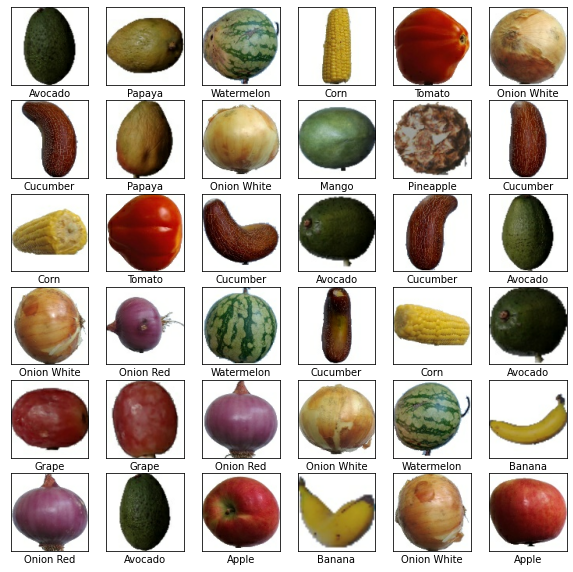

In [20]:
#Show 25 image examples with labels

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(36)):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

#Build Models 

In [21]:
#Change to the model in TensorFlow Hub As Inception V3 model 

#mobilenet_model_spec = model_spec.get('mobilenet_v2')
inception_v3 = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3.input_image_shape = [299, 299]


In [22]:
#Create a custom image classifier model based on the loaded data

model = image_classifier.create(train_data, train_whole_model = True, learning_rate=0.001, validation_data=validation_data, model_spec = inception_v3)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                30735     
Total params: 21,833,519
Trainable params: 21,833,519
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


179/179 [==============================] - 128s 491ms/step - loss: 0.7731 - accuracy: 0.9382 - val_loss: 0.5712 - val_accuracy: 1.0000
Epoch 2/5
179/179 [==============================] - 86s 483ms/step - loss: 0.5763 - accuracy: 1.0000 - val_loss: 0.5654 - val_accuracy: 1.0000
Epoch 3/5
179/179 [==============================] - 86s 482ms/step - loss: 0.5718 - accuracy: 1.0000 - val_loss: 0.5641 - val_accuracy: 1.0000
Epoch 4/5
179/179 [==============================] - 86s 483ms/step - loss: 0.5699 - accuracy: 1.0000 - val_loss: 0.5626 - val_accuracy: 1.0000
Epoch 5/5
179/179 [==============================] - 86s 483ms/step - loss: 0.5686 - accuracy: 1.0000 - val_loss: 0.5623 - val_accuracy: 1.0000


In [23]:
#Have a look at the detailed model structure

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                30735     
Total params: 21,833,519
Trainable params: 21,833,519
Non-trainable params: 0
_________________________________________________________________


In [24]:
#model_viz = tf.keras.utils.plot_model(model,
#                         to_file='model.png',
#                       show_shapes=True,
#                        show_layer_names=True,
#                          rankdir='TB',
#                          expand_nested=True,
#                          dpi=90)
#model_viz

In [25]:
#Evaluate the result of the model, get the loss and accuracy of the model

loss, accuracy = model.evaluate(test_data)

23/23 [==============================] - 6s 187ms/step - loss: 0.5625 - accuracy: 1.0000


#Predict 

In [26]:
predicts = model.predict_top_k(test_data)
predicts[:5]

[[('Cucumber', 0.93652594)],
 [('Cucumber', 0.9058798)],
 [('Watermelon', 0.90584683)],
 [('Onion White', 0.9330615)],
 [('Papaya', 0.91805345)]]

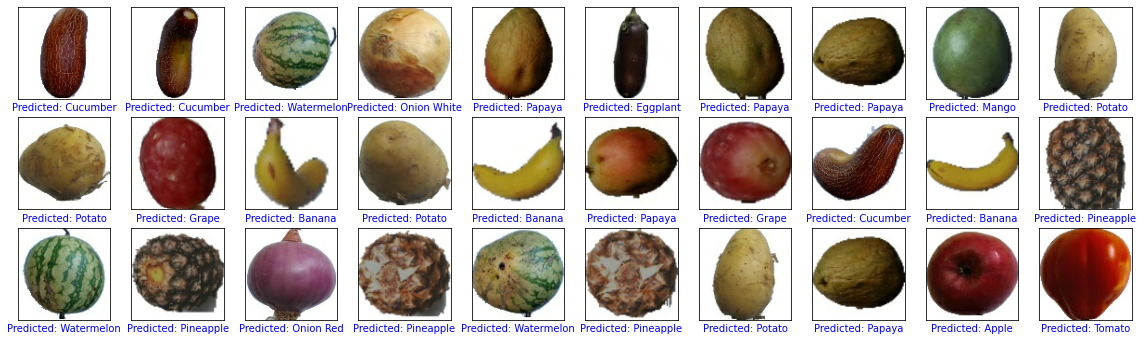

In [27]:
# A helper function that returns 'blue'/'red' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'blue'
  else:
    return 'red'

# Then plot 30 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(30)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [28]:
# Export to TensorFlow Lite Model

model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpyt_61w6h/assets


INFO:tensorflow:Assets written to: /tmp/tmpyt_61w6h/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpg885cla8/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpg885cla8/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [29]:
#Export the .txt file 

model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt
